In [3]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
tf.disable_v2_behavior() 

# load data
np.set_printoptions(precision=3, suppress=True)
df = pd.read_csv("../features/nci4.csv")
string = "x_"
name = ["type"]
input_size = 128
for i in range(input_size):
    name.append(string+str(i))
data = np.array(df[name])
random.shuffle(data)
# print(data, len(data))
features = data[:,1:]
labels = data[:,0]
print(labels)
labels = [lab-1 for lab in labels]
labels = to_categorical(labels, num_classes=3, dtype='float32')
# print(labels)

# Training, validation, and test
split_frac = 0.8
split_idx = int(len(features)*split_frac)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]
# print(train_x)

test_idx = int(len(val_x)*0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]
print(test_y)
print("feature shapes: \t{}".format(features.shape))
print("label shapes: \t\t{}".format(labels.shape))
print("train set: \t\t{}".format(train_x.shape),train_y.shape)
print("validation set: \t{}".format(val_x.shape), val_y.shape)
print("test shapes: \t\t{}".format(test_x.shape),test_y.shape)


def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

[1. 1. 1. ... 2. 2. 3.]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
feature shapes: 	(3639, 128)
label shapes: 		(3639, 3)
train set: 		(2911, 128) (2911, 3)
validation set: 	(364, 128) (364, 3)
test shapes: 		(364, 128) (364, 3)


# Model 1: 1 layer

In [3]:
#  Create model 2
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

batch_size = 128
num_labels = 3
learning_rate = 0.0001
n_hidden_1 = 512 # 1st layer number of features

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, input_size))
  tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(val_x, dtype=tf.float32)
  tf_test_dataset = tf.constant(test_x, dtype=tf.float32)
  
  # Variables.
#   weights = tf.Variable(
#     tf.truncated_normal([image_size * image_size, num_labels]))
#   biases = tf.Variable(tf.zeros([num_labels]))
  
  weights = {
     'h1': tf.Variable(tf.compat.v1.truncated_normal([input_size, n_hidden_1])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1, num_labels]))
  }
  biases = {
     'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([num_labels]))
  }

  # Training computation.
  #   logits = tf.matmul(tf_train_dataset, weights) + biases
  logits = multilayer_perceptron(tf_train_dataset, weights, biases)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
  test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Model 2: 2 layers

In [5]:
# Create model 1
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

batch_size = 128
num_labels = 3
learning_rate = 0.0005
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 512 # 2nd layer number of features

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, input_size))
  tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(val_x, dtype=tf.float32)
  tf_test_dataset = tf.constant(test_x, dtype=tf.float32)
  
  # Variables.
#   weights = tf.Variable(
#     tf.truncated_normal([image_size * image_size, num_labels]))
#   biases = tf.Variable(tf.zeros([num_labels]))
  
  weights = {
     'h1': tf.Variable(tf.compat.v1.truncated_normal([input_size, n_hidden_1])),
     'h2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1, n_hidden_2])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2, num_labels]))
  }
  biases = {
     'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
     'b2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([num_labels]))
  }

  # Training computation.
  #   logits = tf.matmul(tf_train_dataset, weights) + biases
  logits = multilayer_perceptron(tf_train_dataset, weights, biases)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
  test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))

# Model 3: 3 layers

In [181]:
# Create model 3
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

batch_size = 128
num_labels = 3
learning_rate = 0.0005

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, input_size))
  tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(val_x, dtype=tf.float32)
  tf_test_dataset = tf.constant(test_x, dtype=tf.float32)
  
  # Variables.
#   weights = tf.Variable(
#     tf.truncated_normal([image_size * image_size, num_labels]))
#   biases = tf.Variable(tf.zeros([num_labels]))
  n_hidden_1 = 256 # 1st layer number of features
  n_hidden_2 = 512 # 2nd layer number of features
  n_hidden_3 = 256 # 2nd layer number of features
  weights = {
     'h1': tf.Variable(tf.compat.v1.truncated_normal([input_size, n_hidden_1])),
     'h2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1, n_hidden_2])),
     'h3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2, n_hidden_3])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3, num_labels]))
  }
  biases = {
     'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
     'b2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2])),
     'b3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([num_labels]))
  }

  # Training computation.
  #   logits = tf.matmul(tf_train_dataset, weights) + biases
  logits = multilayer_perceptron(tf_train_dataset, weights, biases)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
  test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))

# Model 4: 4 layers

In [183]:
# Create model 4
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

batch_size = 128
num_labels = 3
learning_rate = 0.0005

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, input_size))
  tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(val_x, dtype=tf.float32)
  tf_test_dataset = tf.constant(test_x, dtype=tf.float32)
  
  # Variables.
#   weights = tf.Variable(
#   tf.truncated_normal([image_size * image_size, num_labels]))
#   biases = tf.Variable(tf.zeros([num_labels]))
  n_hidden_1 = 512 # 1st layer number of features
  n_hidden_2 = 1024 # 2nd layer number of features
  n_hidden_3 = 512 # 2nd layer number of features
  n_hidden_4 = 128 # 2nd layer number of features
  weights = {
     'h1': tf.Variable(tf.compat.v1.truncated_normal([input_size, n_hidden_1])),
     'h2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1, n_hidden_2])),
     'h3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2, n_hidden_3])),
     'h4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3, n_hidden_4])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4, num_labels]))
  }
  biases = {
     'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
     'b2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2])),
     'b3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3])),
     'b4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([num_labels]))
  }

  # Training computation.
  #   logits = tf.matmul(tf_train_dataset, weights) + biases
  logits = multilayer_perceptron(tf_train_dataset, weights, biases)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
  test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))

# Model 5: 5 layers

In [23]:
# Create model 4
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
     # Hidden layer with RELU activation
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.relu(layer_5)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return out_layer

batch_size = 128
num_labels = 3
learning_rate = 0.01

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, input_size))
  tf_train_labels = tf.compat.v1.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(val_x, dtype=tf.float32)
  tf_test_dataset = tf.constant(test_x, dtype=tf.float32)
  
  # Variables.
#   weights = tf.Variable(
#   tf.truncated_normal([image_size * image_size, num_labels]))
#   biases = tf.Variable(tf.zeros([num_labels]))
  n_hidden_1 = 512 # 1st layer number of features
  n_hidden_2 = 1024 # 2nd layer number of features
  n_hidden_3 = 512 # 2nd layer number of features
  n_hidden_4 = 256 # 2nd layer number of features
  n_hidden_5 = 128 # 2nd layer number of features
  weights = {
     'h1': tf.Variable(tf.compat.v1.truncated_normal([input_size, n_hidden_1])),
     'h2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1, n_hidden_2])),
     'h3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2, n_hidden_3])),
     'h4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3, n_hidden_4])),
     'h5': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4, n_hidden_5])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_5, num_labels]))
  }
  biases = {
     'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
     'b2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2])),
     'b3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3])),
     'b4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4])),
     'b5': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_5])),
     'out': tf.Variable(tf.compat.v1.truncated_normal([num_labels]))
  }

  # Training computation.
  #   logits = tf.matmul(tf_train_dataset, weights) + biases
  logits = multilayer_perceptron(tf_train_dataset, weights, biases)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  #optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(multilayer_perceptron(tf_valid_dataset, weights, biases))
  test_prediction = tf.nn.softmax(multilayer_perceptron(tf_test_dataset, weights, biases))

# Train and Validation

In [6]:
num_steps = 12000

with tf.compat.v1.Session(graph=graph) as session:
  tf.compat.v1.initialize_all_variables().run()
  print("Initialized")
  losses = []
  Train_accuracy = []
  validation_accuracy = []
  sp = []
  for step in range(num_steps):
    # SGD
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_y.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_x[offset:(offset + batch_size)]
    batch_labels = train_y[offset:(offset + batch_size)]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      losses.append(l)
      Train_accuracy.append(accuracy(predictions, batch_labels))
      validation_accuracy.append(accuracy(valid_prediction.eval(), val_y))
      sp.append(step)
      print("Training loss at step %d: %f" % (step, l))
      print("Training accuracy: %.1f%%" % Train_accuracy[-1])
      print("Validation accuracy: %.1f%%" % validation_accuracy[-1])
  test_accuracy = accuracy(test_prediction.eval(), test_y)
  print("Test accuracy: %.1f%%" % test_accuracy)

Initialized
Training loss at step 0: 723.017334
Training accuracy: 35.9%
Validation accuracy: 18.7%
Training loss at step 500: 80.017303
Training accuracy: 82.8%
Validation accuracy: 64.0%
Training loss at step 1000: 30.466084
Training accuracy: 90.6%
Validation accuracy: 73.4%
Training loss at step 1500: 12.651542
Training accuracy: 96.9%
Validation accuracy: 73.9%
Training loss at step 2000: 0.312856
Training accuracy: 99.2%
Validation accuracy: 73.9%
Training loss at step 2500: 0.149546
Training accuracy: 99.2%
Validation accuracy: 73.9%
Training loss at step 3000: 1.906650
Training accuracy: 95.3%
Validation accuracy: 67.6%
Training loss at step 3500: 0.000000
Training accuracy: 100.0%
Validation accuracy: 75.5%
Training loss at step 4000: 0.000000
Training accuracy: 100.0%
Validation accuracy: 76.1%
Training loss at step 4500: 0.000007
Training accuracy: 100.0%
Validation accuracy: 75.8%
Training loss at step 5000: 0.000005
Training accuracy: 100.0%
Validation accuracy: 75.8%
Trai

# Plot Result

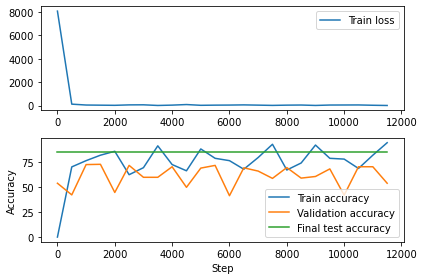

In [92]:
# fig, ax = plt.subplots()
# y = [0, 2500, 5000, 7500, 10000]
test_accuracy = [85.2]*len(sp)
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(211)
plt.plot(sp, losses, label = "Train loss")
plt.legend()
plt.subplot(212)
plt.plot(sp, Train_accuracy, label = "Train accuracy")
plt.plot(sp, validation_accuracy, label = "Validation accuracy")
plt.plot(sp, test_accuracy, label = "Final test accuracy")
plt.xlabel('Step')  
plt.ylabel('Accuracy')
plt.legend()
fig.tight_layout()
plt.savefig("loss.pdf")